In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from github import Github
from datetime import datetime
import geoplot
import geopandas


plt.rcParams["figure.figsize"] = (12, 8)


In [24]:
who_daily_reports_dir_name = "who_daily_reports"

## Download WHO daily reports data

In [25]:
who_repo_name = "CSSEGISandData/COVID-19"
who_repo_daily_reports_dir_path = "csse_covid_19_data/csse_covid_19_daily_reports"

In [26]:
# github = Github("user", "password") # Using authenticated connection changes api limit from 60 per hour to 5000 per hour
github = Github()
repo = github.get_repo(who_repo_name)
reports_dir_content = repo.get_contents(who_repo_daily_reports_dir_path)

In [27]:
reports = list(filter(lambda report: ".csv" in report.name, reports_dir_content))
reports[:5]

[ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv")]

In [28]:
try:
    os.mkdir(who_daily_reports_dir_name)
    print("Created directory", who_daily_reports_dir_name)
except FileExistsError:
    print('WHO daily reports directory already exists')
    
for report in reports:
    try:
        report_file_path = os.path.join(who_daily_reports_dir_name, report.name)
        report_file = open(report_file_path, 'x')
        report_file.write(report.decoded_content.decode('utf-8'))
        report_file.close()
        print("Created report file", report_file_path)
    except FileExistsError:
        print("Daily report file", report_file_path, "already exists")
    except RateLimitExceededException:
        print("API rate limit exceeded, try again in an hour")
        report_file.close()
        os.remove(report_file_path)
        break

WHO daily reports directory already exists
Daily report file who_daily_reports/01-22-2020.csv already exists
Daily report file who_daily_reports/01-23-2020.csv already exists
Daily report file who_daily_reports/01-24-2020.csv already exists
Daily report file who_daily_reports/01-25-2020.csv already exists
Daily report file who_daily_reports/01-26-2020.csv already exists
Daily report file who_daily_reports/01-27-2020.csv already exists
Daily report file who_daily_reports/01-28-2020.csv already exists
Daily report file who_daily_reports/01-29-2020.csv already exists
Daily report file who_daily_reports/01-30-2020.csv already exists
Daily report file who_daily_reports/01-31-2020.csv already exists
Daily report file who_daily_reports/02-01-2020.csv already exists
Daily report file who_daily_reports/02-02-2020.csv already exists
Daily report file who_daily_reports/02-03-2020.csv already exists
Daily report file who_daily_reports/02-04-2020.csv already exists
Daily report file who_daily_repor

## WHO daily reports basic analysis

In [29]:
column_names = ['Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

reports_files = sorted(os.listdir(who_daily_reports_dir_name))
reports = []
for report_file in reports_files:
    date = datetime.strptime(report_file[:-4], '%m-%d-%Y')
    dataframe = pd.read_csv(os.path.join(who_daily_reports_dir_name, report_file))[column_names]

    dataframe['Province/State'].fillna("NotSpecified", inplace=True)
    dataframe.fillna(0, inplace=True)

    dataframe = dataframe.astype({'Confirmed': 'int32', 'Deaths': 'int32', 'Recovered': 'int32'}, copy=False)
    
    reports.append((date, dataframe))


In [30]:
print(reports[0][1].dtypes)
print(reports[0][0])
reports[0][1]

Province/State    object
Country/Region    object
Confirmed          int32
Deaths             int32
Recovered          int32
dtype: object
2020-01-22 00:00:00


,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1,0,0
1,Beijing,Mainland China,14,0,0
2,Chongqing,Mainland China,6,0,0
3,Fujian,Mainland China,1,0,0
4,Gansu,Mainland China,0,0,0
5,Guangdong,Mainland China,26,0,0
6,Guangxi,Mainland China,2,0,0
7,Guizhou,Mainland China,1,0,0
8,Hainan,Mainland China,4,0,0
9,Hebei,Mainland China,1,0,0


/home/jakub/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


[547.0, 639.0, 916.0, 1399.0, 2062.0, 2863.0, 5494.0, 6070.0, 8124.0, 9783.0, 11871.0, 16607.0, 19693.0, 23680.0, 27409.0, 30553.0, 34075.0, 36778.0, 39790.0, 42306.0, 44327.0, 44699.0, 59832.0, 66292.0, 68347.0, 70446.0, 72364.0, 74139.0, 74546.0, 74999.0, 75472.0, 76922.0, 76938.0, 77152.0, 77660.0, 78065.0, 78498.0, 78824.0, 79251.0, 79826.0, 80026.0, 80151.0, 80271.0, 80422.0, 80573.0, 80652.0, 80699.0, 80735.0, 80757.0, 80921, 80932, 80945.0, 80977.0, 81003.0]


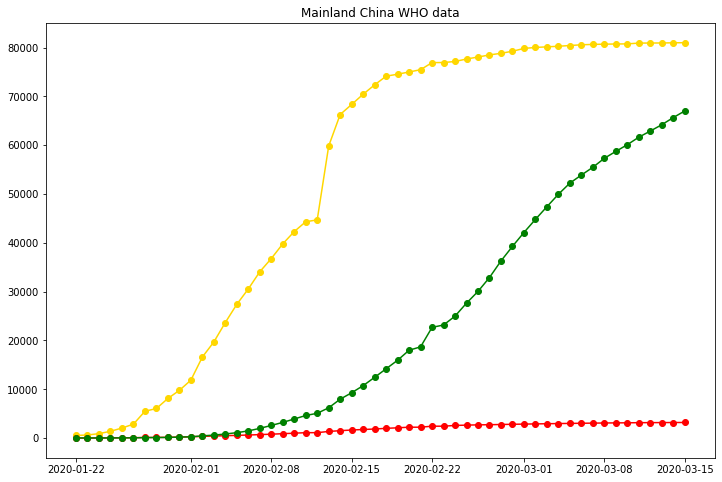

In [31]:
report = reports[0][1]

dates = []
mainland_china_confirmed = []
mainland_china_deaths = []
mainland_china_recovered = []

for report in reports:
    dates.append(report[0])
    region_aggregated_stats = report[1].groupby('Country/Region').sum()
    mainland_china_stats = region_aggregated_stats.loc[['Mainland China', 'China'], :].sum()
    mainland_china_confirmed.append(mainland_china_stats['Confirmed'])
    mainland_china_deaths.append(mainland_china_stats['Deaths'])
    mainland_china_recovered.append(mainland_china_stats['Recovered'])

print(mainland_china_confirmed)
fig, ax = plt.subplots()
ax.set_title('Mainland China WHO data')
ax.plot(dates, mainland_china_confirmed, 'o-', c='gold')
ax.plot(dates, mainland_china_deaths, 'o-', c='red')
ax.plot(dates, mainland_china_recovered, 'o-', c='green')
plt.show()

## Get geopandas world map dataframe

In [32]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Merge world map dataframe with latest WHO report dataframe

In [33]:
last_report = reports[-1][1].groupby("Country/Region", as_index=False).sum()
merged = world.join(last_report.set_index("Country/Region"), on="name")
# tmp fix, TODO create mapping betwen couries names in world map df and report df
merged.fillna(0, inplace=True)
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Confirmed,Deaths,Recovered
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,0.0,0.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,0.0,0.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,0.0,0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",250.0,1.0,8.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0,0.0,0.0


## Plot number of confirmed cases on the map

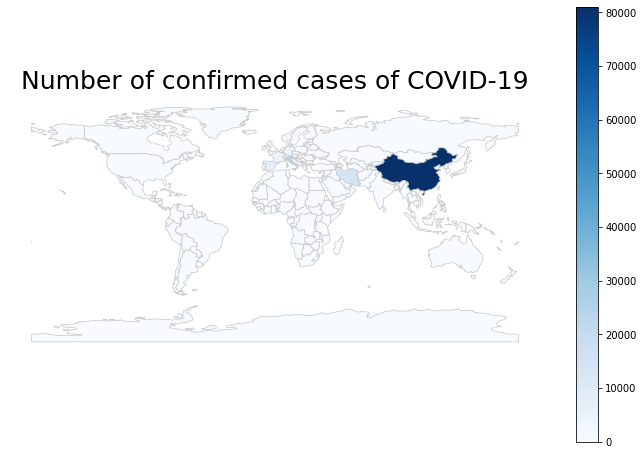

In [34]:
def plot_map(column_name, df, title):
    fig, ax = plt.subplots(1, 1)
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    vmin, vmax = df[column_name].min(), df[column_name].max()
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm)
    df.plot(column=column_name, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    plt.show()
    
plot_map("Confirmed", merged, "Number of confirmed cases of COVID-19")   

## Filter european countries, get rid of Russia and French Guiana

In [35]:
europe_stats_df = merged.loc[merged['continent'] == 'Europe', :].loc[merged['name'] != 'Russia', :]
france_geometry_values = europe_stats_df.loc[europe_stats_df['name'] == 'France', 'geometry'].values
france_geometry_values[0] = france_geometry_values[0][1:]
europe_stats_df.loc[europe_stats_df['name'] == 'France', 'geometry'] = france_geometry_values

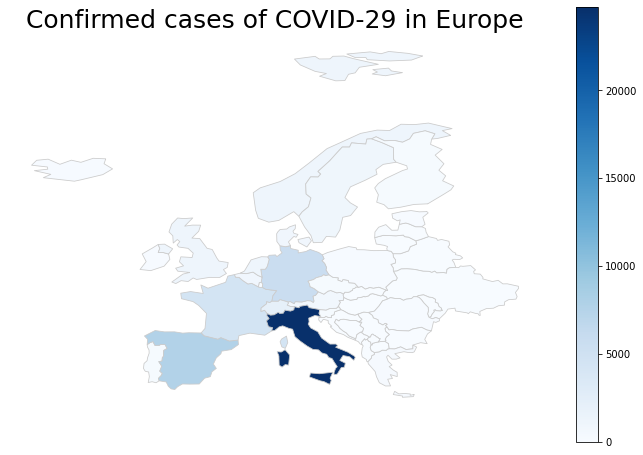

In [36]:
plot_map("Confirmed", europe_stats_df, "Confirmed cases of COVID-29 in Europe")

## Get population dataframe (data from https://worldpopulationreview.com/)

In [37]:
population = pd.read_csv("popultion.csv")[['name', 'pop2020']]
population["pop2020"] *= 1000
population.head()

,name,pop2020
0,China,1.439324e+09
1,India,1.380004e+09
2,United States,3.310027e+08
3,Indonesia,2.735236e+08
4,Pakistan,2.208923e+08


In [38]:
# population of Poland
population.loc[population['name'] == 'Poland', "pop2020"].values[0]

37846611.0

In [39]:
last_report_with_population = last_report.join(population.set_index("name"), on='Country/Region')
# tmp fix, TODO create mapping betwen couries names in population df and report df
last_report_with_population = last_report_with_population.dropna(axis='index')
last_report_with_population

,Country/Region,Confirmed,Deaths,Recovered,pop2020
0,Afghanistan,16,0,0,38928346.0
1,Albania,42,1,0,2877797.0
2,Algeria,48,4,12,43851044.0
3,Andorra,1,0,1,77265.0
4,Antigua and Barbuda,1,0,0,97929.0
...,...,...,...,...,...
141,United Kingdom,1144,21,19,67886011.0
142,Uruguay,4,0,0,3473730.0
143,Uzbekistan,1,0,0,33469203.0
144,Venezuela,10,0,0,28435940.0


In [40]:
last_report_with_percentage = last_report_with_population
last_report_with_percentage["Confirmed percentage"] = last_report_with_population["Confirmed"] / last_report_with_population["pop2020"]
last_report_with_percentage["Deaths percentage"] = last_report_with_population["Deaths"] / last_report_with_population["pop2020"]
last_report_with_percentage["Recovered percentage"] = last_report_with_population["Recovered"] / last_report_with_population["pop2020"]
last_report_with_percentage

,Country/Region,Confirmed,Deaths,Recovered,pop2020,Confirmed percentage,Deaths percentage,Recovered percentage
0,Afghanistan,16,0,0,38928346.0,4.110116e-07,0.000000e+00,0.000000e+00
1,Albania,42,1,0,2877797.0,1.459450e-05,3.474880e-07,0.000000e+00
2,Algeria,48,4,12,43851044.0,1.094615e-06,9.121790e-08,2.736537e-07
3,Andorra,1,0,1,77265.0,1.294247e-05,0.000000e+00,1.294247e-05
4,Antigua and Barbuda,1,0,0,97929.0,1.021148e-05,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
141,United Kingdom,1144,21,19,67886011.0,1.685178e-05,3.093421e-07,2.798809e-07
142,Uruguay,4,0,0,3473730.0,1.151500e-06,0.000000e+00,0.000000e+00
143,Uzbekistan,1,0,0,33469203.0,2.987821e-08,0.000000e+00,0.000000e+00
144,Venezuela,10,0,0,28435940.0,3.516676e-07,0.000000e+00,0.000000e+00


In [41]:
max_infected = last_report_with_percentage.loc[last_report_with_percentage['Confirmed percentage'].idxmax(), :]
min_infected = last_report_with_percentage.loc[last_report_with_percentage['Confirmed percentage'].idxmin(), :]
print(f"Minimal procentage of population infected {min_infected['Country/Region']}")
print(f"Maximal procentage of population infected {max_infected['Country/Region']}")

Minimal procentage of population infected Ethiopia
Maximal procentage of population infected San Marino


In [42]:
infected_map = world.join(last_report_with_percentage.set_index("Country/Region"), on="name")
# tmp fix, TODO create mapping betwen couries names in world map df and report df
infected_map.fillna(0, inplace=True)
infected_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Confirmed,Deaths,Recovered,pop2020,Confirmed percentage,Deaths percentage,Recovered percentage
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",250.0,1.0,8.0,37742154.0,0.000007,2.649557e-08,2.119646e-07
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00


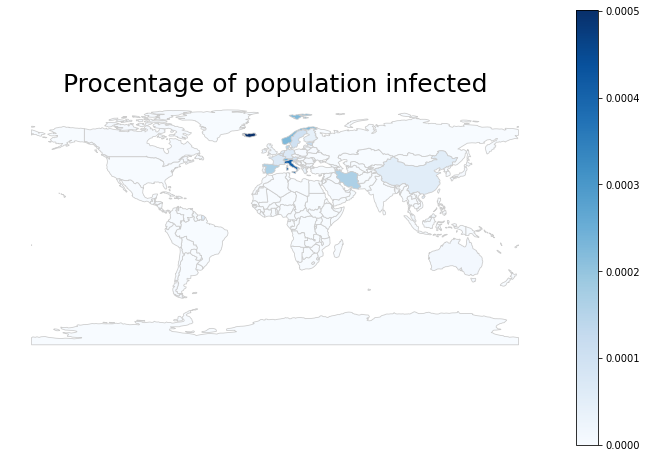

In [43]:
plot_map("Confirmed percentage", infected_map, "Procentage of population infected")

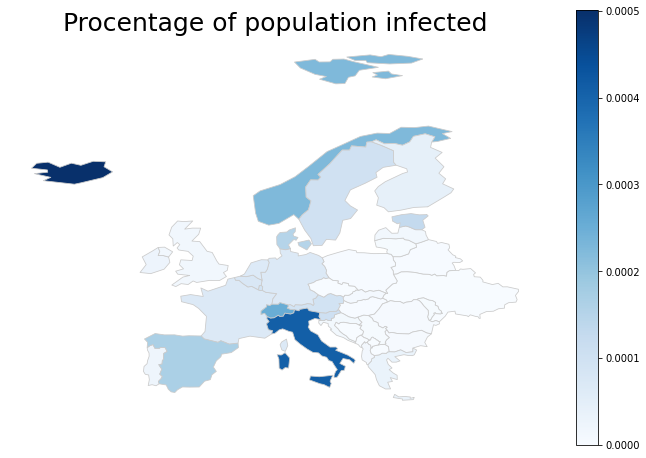

In [44]:
infected_europe = infected_map.loc[merged['continent'] == 'Europe', :].loc[merged['name'] != 'Russia', :]
france_geometry_values = infected_europe.loc[europe_stats_df['name'] == 'France', 'geometry'].values
france_geometry_values[0] = france_geometry_values[0][1:]
france_geometry_values[0]
infected_europe.loc[europe_stats_df['name'] == 'France', 'geometry'] = france_geometry_values
plot_map("Confirmed percentage", infected_europe, "Procentage of population infected")